# Position of a Quasar

We make measurement of the position of a quasar $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position $\mu = 1$ is (in suitable units), and the erorrs are $\sigma = 0.2$ .

## Part 1

#### Let's start generating fake measurements and treat each observations as an estimate of the true distribution, centering a gaussian on it. 

In [1]:
import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

In [2]:
N = 10 #number of quasar position
mu = 1
sigma = 0.2

xi = np.random.normal(mu, sigma, N)

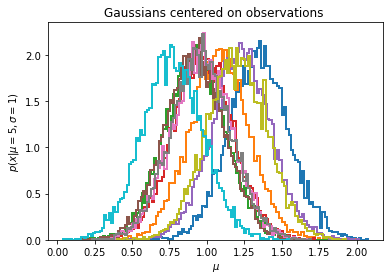

In [3]:
for i in range(len(xi)):
    zi = np.random.normal(xi[i], sigma, 10000)
    plt.hist(zi,bins = 100, histtype = 'step', density=True, linewidth = 2);
    
plt.title("Gaussians centered on observations ")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.show()

#### Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset)

In [4]:
xgrid = np.linspace(0.0,2.0, 1000)
print(xi)
L_single = np.array([norm.pdf(xgrid,loc=x,scale=sigma) for x in xi]) #array of distribution

L = np.prod(L_single, axis=0)

[1.34635689 1.08340364 0.92268569 0.97568878 1.22950841 0.91720158
 0.96406005 0.96149608 1.19884283 0.76998682]


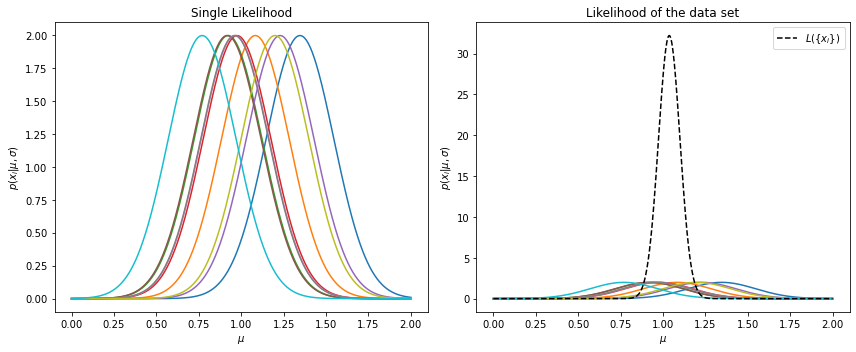

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
for thisL in L_single:
    ax1.plot(xgrid, thisL, ls='-')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel(r'$p(x_i|\mu,\sigma)$')
ax1.set_title('Single Likelihood')


for thisL in L_single:
    ax2.plot(xgrid, thisL, ls='-')
ax2.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x_{i}\})$')

ax2.set_xlabel('$\mu$')
ax2.set_ylabel(r'$p(x_i|\mu,\sigma)$')
ax2.set_title('Likelihood of the data set')
ax2.legend()

fig.tight_layout() 
plt.show()

In [6]:
print("The Likelihood of the entire dataset is maximaized at: %.3f" % xgrid[np.argsort(L)[-1]])

The Likelihood of the entire dataset is maximaized at: 1.037


In [7]:
MLE = np.mean(xi)
print("MLE estimator: %.3f" % MLE)


MLE estimator: 1.037


## Part 2

#### We want to study the error on ourt estimator

In [8]:
sigma_MLE = sigma/np.sqrt(N)
print("Expected error on the MLE %.3f" % sigma_MLE)


Expected error on the MLE 0.063


We want to estimate the error on our model parameter, so we have to compute: 
$$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}}, $$

where $ F $ is the * Fisher matrix*, whose entries are defined as follow: 

$$ F_{jk} = - \frac{d^2 \ln L}{d\theta_j d\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$


We need to compute a second order derivative on the log-L

Text(0, 0.5, '$ln(p(x|\\mu=5,\\sigma=1))$')

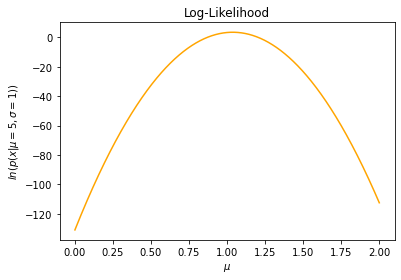

In [9]:
LogL = np.log(L)
plt.plot(xgrid, LogL, color = 'orange');
plt.title("Log-Likelihood")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$ln(p(x|\mu=5,\sigma=1))$')

In [10]:
d2L = np.diff(LogL, n=2) #second derivative
Delta = (xgrid[1]-xgrid[0])**2
d2L_norm = d2L/Delta

sig = 1/np.sqrt(-1*d2L_norm[np.argsort(L)[-1]])

print("Expected error on the MLE %.3f" % sigma_MLE)
print("Fisher matrix error on estimated mean %.3f" % sig)


Expected error on the MLE 0.063
Fisher matrix error on estimated mean 0.063


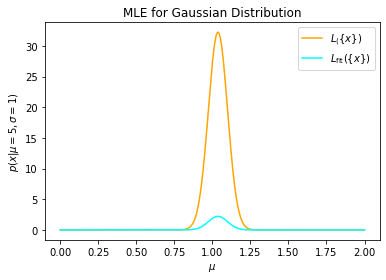

In [11]:
C = 0.35 #rescaling parameter
plt.plot(xgrid, L, color = 'orange', label = r'$L_(\{x\})$');

dist2 = norm(MLE, sigma_MLE)

plt.plot(xgrid, C*dist2.pdf(xgrid), label = r'$L_\mathrm{fit}(\{x\})$', color= 'cyan');
plt.title('MLE for Gaussian Distribution')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.legend()
plt.show()

## Part 3: Heteroscedastic case

We measure the quasar at different night so our errors are heteroscedastic. Let's assume that each measurment has a $\sigma_{i} $ that is normally distribured with mean $0.2$ and standard deviation $0.05$ .

In [12]:
N = 10
mu = 1
sigma = np.random.normal(0.2, 0.05, N)
xi = np.random.normal(mu, sigma, N)

In [13]:
xgrid = np.linspace(0.0,2.0, 1000)

L_single = np.array([norm.pdf(xgrid,loc=xi,scale=sig) for xi,sig in zip(xi,sigma)])

L = np.prod(L_single, axis=0)

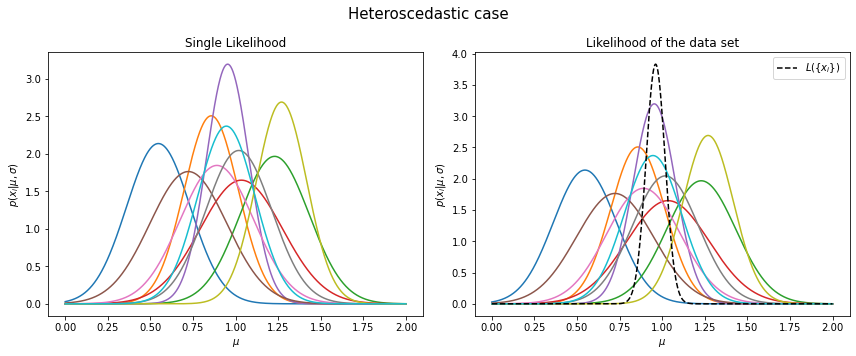

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Heteroscedastic case', fontsize = 15)
for thisL in L_single:
    ax1.plot(xgrid, thisL, ls='-')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel(r'$p(x_i|\mu,\sigma)$')
ax1.set_title('Single Likelihood')


for thisL in L_single:
    ax2.plot(xgrid, thisL, ls='-')
ax2.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x_{i}\})$')

ax2.set_xlabel('$\mu$')
ax2.set_ylabel(r'$p(x_i|\mu,\sigma)$')
ax2.set_title('Likelihood of the data set')
ax2.legend()

fig.tight_layout() 
plt.show()

In [15]:
print("The Likelihood of the entire dataset is maximaized at: %.3f" % xgrid[np.argsort(L)[-1]])

The Likelihood of the entire dataset is maximaized at: 0.961


In [16]:
MLE = np.average(xi,weights=1/sigma**2)
print("MLE estimator: %.3f" % MLE)

MLE estimator: 0.961


In [17]:
sigma_MLE = np.sum(sigma**-2)**-0.5
print("Expected error on the MLE %.3f" % sigma_MLE)


Expected error on the MLE 0.056


In [18]:
LogL = np.log(L)
d2L = np.diff(LogL, n=2) #second derivative
Delta = (xgrid[1]-xgrid[0])**2
d2L_norm = d2L/Delta

sig = 1/np.sqrt(-1*d2L_norm[np.argsort(L)[-1]])

print("Expected error on the MLE %.3f" % sigma_MLE)
print("Fisher matrix error on estimated mean %.3f" % sig)


Expected error on the MLE 0.056
Fisher matrix error on estimated mean 0.056


### 